# `logistic-regression-pytorch`

Task: Fit a logistic regression model using PyTorch and fastai's Learner class.

## Setup

In [1]:
!pip install -Uq fastbook

In [5]:
from fastai.vision.all import *
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [3]:
iris = sklearn.datasets.load_iris()

In [13]:
# based on https://scikit-learn.org/stable/auto_examples/classification/plot_classification_probability.html#sphx-glr-auto-examples-classification-plot-classification-probability-py
# and https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_iris.html#sphx-glr-auto-examples-linear-model-plot-sgd-iris-py
X = tensor(iris.data).float()
y = tensor(iris.target)
n_features = X.shape[1]

data = L(zip(X, y))

In [14]:
splitter = RandomSplitter(seed = 2021032)

In [15]:
train_indices, valid_indices = splitter(data)
train_indices, valid_indices

((#120) [124,35,62,23,60,91,13,123,39,88...],
 (#30) [38,32,100,125,134,27,9,110,49,83...])

In [50]:
train_dl = DataLoader(data[train_indices], batch_size=10)

In [25]:
valid_dl = DataLoader(data[valid_indices], batch_size=10)

In [66]:
dataloaders = DataLoaders(train_dl, valid_dl)

## Task

Fit a Logistic Regression model on the classic Iris dataset.

## Solution

Add code and Markdown cells for each of the listed tasks above.

**Fill in the blanks to construct a `model`**:

```
model = nn.Linear(in_features=..., out_features=..., bias=...)
```

* For `in_features`, think about the shape of the data coming in.
* For `out_features`, think about how many logits we're going to need.

In [49]:
# your code here
model = nn.Linear(in_features=4, out_features=3, bias=True)

To check that we got it right, **call the `model` with the input data from one example batch**.

Let's get an example batch from the training set dataloader:

In [51]:
X_batch, y_batch = train_dl.one_batch()
X_batch

tensor([[6.7000, 3.3000, 5.7000, 2.1000],
        [5.0000, 3.2000, 1.2000, 0.2000],
        [6.0000, 2.2000, 4.0000, 1.0000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [5.0000, 2.0000, 3.5000, 1.0000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [5.6000, 3.0000, 4.1000, 1.3000]])

Now, give that batch to the model:

In [53]:
# your code here
model(X_batch)

tensor([[2.1494, 1.4069, 0.1464],
        [0.7980, 1.5913, 0.7903],
        [2.0268, 1.0533, 0.1028],
        [0.8790, 1.5996, 0.7460],
        [1.7207, 0.8521, 0.1642],
        [1.9557, 1.2270, 0.2499],
        [0.7486, 1.3054, 0.7974],
        [2.0073, 1.2923, 0.0933],
        [0.8983, 1.5635, 0.8133],
        [1.7146, 1.1943, 0.3405]], grad_fn=<AddmmBackward>)

In [64]:
model.weight.shape

torch.Size([3, 4])

In [62]:
model.bias.shape

torch.Size([3])

**Create a `loss_func` by instantiating an `nn.CrossEntropyLoss`.**

In [54]:
# your code here
loss_func = nn.CrossEntropyLoss()

**Evaluate the loss on the  `loss_func` on the example batch.** 

Note: PyTorch loss functions take inputs, then targets. `sklearn` loss functions (metrics) use the reverse order.

In [65]:
loss_func(model(X_batch), y_batch)

tensor(1.5501, grad_fn=<NllLossBackward>)

**Construct a `Learner`.**

* Use the `dataloaders`, `model`, and `loss_func` constructed above.
* Omit `opt_func` to use the default.
* Use `accuracy` as a metric.

In [67]:
learner = Learner(
    dls=DataLoaders(train_dl, valid_dl),
    model=model,
    loss_func=loss_func,
    metrics=[accuracy],
)

**Train the model for 50 epochs**.

Use a learning rate of 1e-1.

Note: If you want to try alternative learning rates or other parameters here,
call `learner.reset_parameters()` before `fit`.

In [72]:
learner.fit(50, lr=1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,1.030352,0.584177,0.566667,00:00
1,0.776864,0.453713,0.633333,00:00
2,0.646259,0.428426,0.666667,00:00
3,0.568707,0.535532,0.633333,00:00
4,0.521681,0.721264,0.566667,00:00
5,0.500812,0.767423,0.566667,00:00
6,0.493394,0.529544,0.666667,00:00
7,0.468996,0.337594,0.866667,00:00
8,0.426427,0.282539,0.866667,00:00
9,0.383628,0.279813,0.866667,00:00


**Plot the training and validation loss.**

You can use the convenient `plot_loss` method of `learner.recorder`.

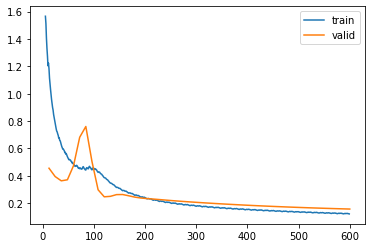

In [70]:
learner.recorder.plot_loss()

**Make a prediction by hand**

In [86]:
x = X_train[0:1]
model(x)

tensor([[13.4049,  8.1513, -9.6802]], grad_fn=<AddmmBackward>)

In [93]:
y_train[0]

tensor(0)

**Was this prediction correct?**

**Use `model.weight` and `model.bias` to make the same prediction**.

In [90]:
x @ model.weight.T + model.bias

tensor([[13.4049,  8.1513, -9.6802]], grad_fn=<AddBackward0>)

**Compute the predicted probabilities.**

The model outputs logits, so you'll need to use `softmax`. Be careful with dimensionality.

In [96]:
model(x).softmax(dim=1)

tensor([[9.9480e-01, 5.2016e-03, 9.3756e-11]], grad_fn=<SoftmaxBackward>)

In [47]:
import sklearn.linear_model

In [48]:
#clf = sklearn.linear_model.SGDClassifier(
#    loss='log', alpha=0.001, max_iter=100,
#    learning_rate='invscaling', eta0=1e2,
#    verbose=True
#)
clf = sklearn.linear_model.LogisticRegression(C=1.).fit(X[train_indices], y[train_indices])
clf.score(X[valid_indices], y[valid_indices])

0.9666666666666667

In [148]:
clf.intercept_

array([ 7.16029684,  1.47437816, -8.63467499])

In [149]:
clf.coef_

array([[-2.5174083 ,  2.20947286],
       [ 0.5795195 , -1.36721673],
       [ 1.93788879, -0.84225613]])

In [166]:
model.weight.data.copy_(tensor(clf.coef_))

tensor([[-2.5174,  2.2095],
        [ 0.5795, -1.3672],
        [ 1.9379, -0.8423]])

In [167]:
model.bias.data.copy_(tensor(clf.intercept_))

tensor([ 7.1603,  1.4744, -8.6347])

In [92]:
clf.t_

5401.0

In [60]:
clf.n_iter_

45

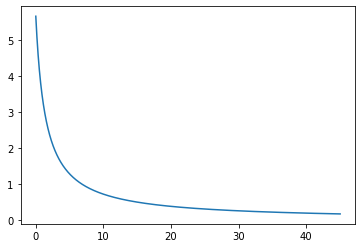

In [99]:
alpha = 0.001
typw = np.sqrt(1.0 / np.sqrt(alpha))
# computing eta0, the initial learning rate
initial_eta0 = typw / max(1.0, clf.loss_function_.dloss(-typw, 1.0))
# initialize t such that eta at first sample equals eta0
optimal_init = 1.0 / (initial_eta0 * alpha)

t = np.arange(5400)
eta = 1.0 / (alpha * (optimal_init + t - 1))
plt.plot(t / len(train_indices), eta)

In [66]:
sklearn.metrics.log_loss(y[valid_indices], clf.predict_proba(X[valid_indices]))

0.9704663586498072

In [64]:
sklearn.metrics.log_loss

## Analysis